In [111]:
#Inportando bibliotecas
import pandas as pd

#Biblioteca Grafica
import matplotlib.pyplot as plt
import numpy as np
#Biblioteca Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [112]:
#carregar csv
df = pd.read_csv('pneumologista_joao_pacientes.csv')
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,F,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masc,Não,Não,Moderado,Média,Sim,Moderado,Não,...,NaN,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masc,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,M,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,Fem,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,Masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,Feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,Outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


In [113]:
print(df.columns)

Index(['nome_paciente', 'idade', 'sexo', 'tabagismo', 'descoloracao_dedos',
       'estresse_mental', 'exposicao_poluicao', 'doenca_cronica',
       'nivel_energia', 'fraqueza_imunologica', 'problema_respiratorio',
       'consumo_alcool', 'desconforto_garganta', 'saturacao_oxigenio',
       'aperto_peito', 'historico_familiar', 'historico_tabagismo_familiar',
       'estresse_imunologico', 'doenca_pulmonar', 'peso_kg', 'altura_m', 'imc',
       'risco_cancer_pulmao'],
      dtype='object')


In [114]:
#tratar nulos:

In [115]:
df["saturacao_oxigenio"] = df["saturacao_oxigenio"].fillna(df["saturacao_oxigenio"].median())

In [116]:
df["peso_kg"] = df["peso_kg"].fillna(df["peso_kg"].median())

In [117]:
df["altura_m"] = df["altura_m"].fillna(df["altura_m"].median())

In [118]:
#tratar acoluna (sexo)
df["sexo"] = (df["sexo"].astype(str).str.strip().str.lower()
    .map({"masc":"M", "m":"M", "masculino":"M", "f":"F", "fem":"F", "feminino":"F", "outro":"O", "não declarado":"O"})
)
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,F,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,M,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,M,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,M,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,O,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,F,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,M,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,F,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,O,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


In [119]:
## IMC
# Converter altura para metros se necessário
df["altura_m"] = df["altura_m"].apply(lambda x: x/100 if x > 3 else x)

# Calcular IMC
df["IMC"] = df["peso_kg"] / (df["altura_m"]**2)

# Excluir valores absurdos (ex.: IMC < 10 ou > 60)
df.loc[(df["IMC"] < 10) | (df["IMC"] > 60), "IMC"] = None
df["IMC"] = df["IMC"].fillna(df["IMC"].median())


In [120]:
df.to_csv("pacientes_pulmao_limpo.csv", index=False)
print("Versão limpa salva com sucesso!")

Versão limpa salva com sucesso!


In [121]:
##Graficos

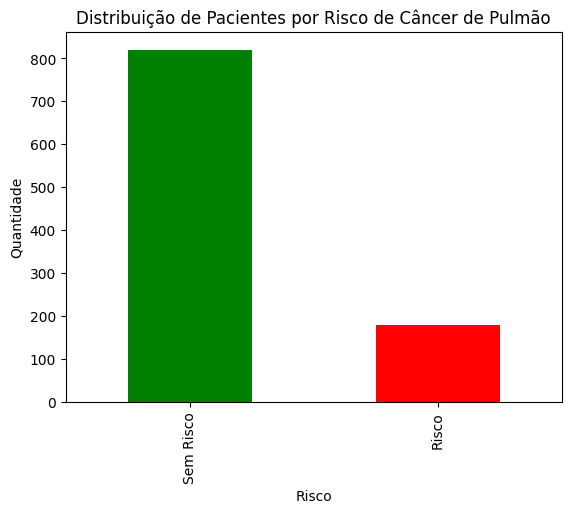

In [122]:
df["risco_cancer_pulmao"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title("Distribuição de Pacientes por Risco de Câncer de Pulmão")
plt.xlabel("Risco")
plt.ylabel("Quantidade")
plt.show()

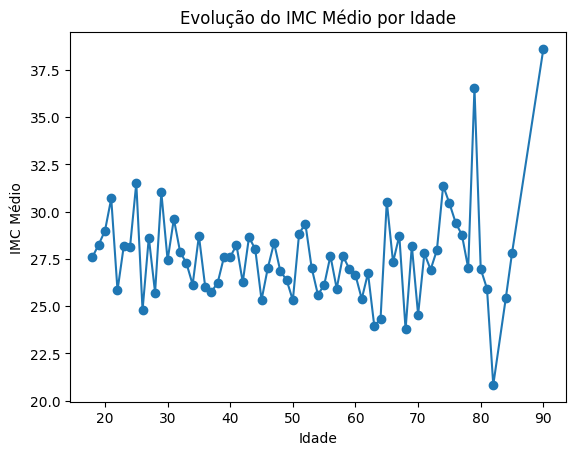

In [123]:
df.groupby("idade")["IMC"].mean().plot(kind="line", marker="o")
plt.title("Evolução do IMC Médio por Idade")
plt.xlabel("Idade")
plt.ylabel("IMC Médio")
plt.show()

In [124]:
##numpy
imc_medio = np.mean(df["IMC"])
imc_desvio = np.std(df["IMC"])
print("Média do IMC:", round(imc_medio,2))
print("Desvio Padrão do IMC:", round(imc_desvio,2))

Média do IMC: 27.16
Desvio Padrão do IMC: 6.07


In [125]:
#machine larning

In [126]:
X = df.drop(columns=["nome_paciente","risco_cancer_pulmao","IMC"])
y = df["risco_cancer_pulmao"].map({"Sem Risco":0, "Risco":1})

In [127]:
categorical = X.select_dtypes(include=["object"]).columns
numeric = X.select_dtypes(exclude=["object"]).columns

In [128]:
preprocess = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical),("num", StandardScaler(), numeric)])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [130]:
# Pipeline
pipeline = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.91
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       164
           1       0.88      0.58      0.70        36

    accuracy                           0.91       200
   macro avg       0.89      0.78      0.82       200
weighted avg       0.91      0.91      0.90       200

